In [1]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf
import urllib.request


!wget 'https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt'

--2023-04-09 20:48:23--  https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 760 [text/plain]
Saving to: ‘mini_classes.txt.43’

100%[======================================>] 760         --.-K/s   in 0s      

2023-04-09 20:48:24 (32.7 MB/s) - ‘mini_classes.txt.43’ saved [760/760]



In [2]:
f = open("mini_classes.txt","r")
# And for reading use
classes = f.readlines()
f.close()

classes = [c.replace('\n','').replace(' ','_') for c in classes]
classes = classes[0:100]

In [3]:
!mkdir data

def download():
  
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in classes:
    cls_url = c.replace('_', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, 'data/'+c+'.npy')
    
    
    data = np.load('data/' + c + '.npy')
    data = data[:int(0.05 * len(data))]
    np.save('data/' + c + '.npy', data)
    
    
download()


mkdir: cannot create directory ‘data’: File exists
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/drums.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/laptop.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball%20bat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dumbbell.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/traffic%20light.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/wristwat

In [3]:
all_files = glob.glob(os.path.join('data', '*.npy'))

print(len(all_files))
numImages = 0

for i in all_files:
    data = np.load(all_files[0])
    numImages += data.shape[0]

print(numImages)

100
644200


In [4]:
def load_data(root, vfold_ratio=0.2, max_items_per_class= 2000 ):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    
    for i in range(len(all_files)):
        file = all_files[i]
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], i)
        
        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

x_train, y_train, x_test, y_test, class_names = load_data('data')
num_classes = len(class_names)
image_size = 28

print(len(x_train))

160000


In [5]:
actualLabels = y_test.copy()
originalTestImages = x_test.copy()

42591


ValueError: can only convert an array of size 1 to a Python scalar

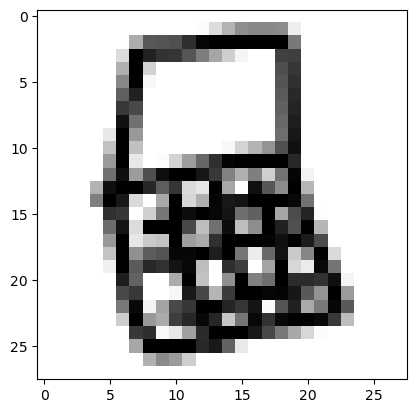

In [17]:
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline  
idx = randint(0, len(x_train))
print(idx)
plt.imshow(x_train[idx].reshape(28,28), cmap=plt.cm.binary) 
print(class_names[int(y_train[idx].item())])

34598
wheel


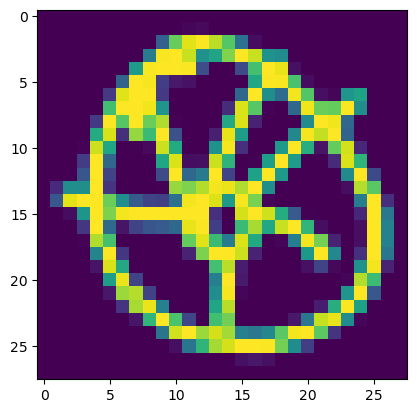

In [104]:
%matplotlib inline  
idx = randint(0, len(originalTestImages))
print(idx)
plt.imshow(originalTestImages[idx].reshape(28,28)) 
print(class_names[int(actualLabels[idx].item())])

In [8]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
model = keras.Sequential() #empty sequential model


#add layers

model.add(layers.Convolution2D(16, (3, 3), padding="same", input_shape=x_train.shape[1:], activation="relu", data_format='channels_last'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same', data_format='channels_last'))
model.add(layers.Convolution2D(32, (3, 3), padding="same", input_shape=x_train.shape[1:], activation="relu", data_format='channels_last'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same', data_format='channels_last'))
model.add(layers.Convolution2D(64, (3, 3), padding="same", input_shape=x_train.shape[1:], activation="relu", data_format='channels_last'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same', data_format='channels_last'))
model.add(layers.Convolution2D(128, (3, 3), padding="same", input_shape=x_train.shape[1:], activation="relu", data_format='channels_last'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same', data_format='channels_last'))
model.add(layers.Flatten()) #converts output of previous layer into 1d array
model.add(layers.Dense(256, activation='relu')) #dense maps each input layer to the output
model.add(layers.Dense(y_train.shape[1], activation='softmax'))

#train model
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


2023-04-09 20:49:44.857434: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [10]:
model.fit(x = x_train, y = y_train, validation_split=0.1, batch_size = 256, verbose=2, epochs=5)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1] * 100))

Epoch 1/5
563/563 - 109s - loss: 2.2393 - accuracy: 0.4481 - val_loss: 1.5392 - val_accuracy: 0.6063 - 109s/epoch - 194ms/step
Epoch 2/5
563/563 - 98s - loss: 1.3582 - accuracy: 0.6517 - val_loss: 1.2774 - val_accuracy: 0.6735 - 98s/epoch - 174ms/step
Epoch 3/5
563/563 - 102s - loss: 1.1533 - accuracy: 0.7019 - val_loss: 1.1558 - val_accuracy: 0.7052 - 102s/epoch - 181ms/step
Epoch 4/5
563/563 - 102s - loss: 1.0346 - accuracy: 0.7307 - val_loss: 1.0797 - val_accuracy: 0.7251 - 102s/epoch - 182ms/step
Epoch 5/5
563/563 - 98s - loss: 0.9546 - accuracy: 0.7504 - val_loss: 1.0454 - val_accuracy: 0.7349 - 98s/epoch - 174ms/step
Test accuarcy: 72.92%


In [11]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(x_test)

print(predictions)

1250/1250 [==============================] - 11s 9ms/step
[[0.00989414 0.01048165 0.00994815 ... 0.00989398 0.01040748 0.00989972]
 [0.00983209 0.0098318  0.00983183 ... 0.00983191 0.0098318  0.00983189]
 [0.00987016 0.00986525 0.00986532 ... 0.00986512 0.00986575 0.00986518]
 ...
 [0.00988324 0.00990783 0.00988897 ... 0.00988324 0.00992662 0.00988324]
 [0.00983209 0.00983192 0.00983192 ... 0.02659023 0.00983192 0.00983192]
 [0.00991222 0.00993962 0.00993087 ... 0.00990228 0.00990772 0.01010832]]


In [12]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

baseball_bat
screwdriver
[0.00987858 0.00987848 0.00987709 0.00987715 0.00987702 0.00987705
 0.00988214 0.00987711 0.00987702 0.00987702 0.00987703 0.00987707
 0.00998272 0.00987703 0.00987702 0.00987717 0.00987745 0.00987932
 0.00987702 0.00987703 0.00997469 0.00987702 0.00987709 0.00987771
 0.00987712 0.00987702 0.00987836 0.00987702 0.00987743 0.00987703
 0.00987702 0.00987707 0.00987703 0.00987817 0.00987722 0.00987739
 0.00987702 0.00987702 0.00987724 0.00987702 0.00987984 0.00989571
 0.00987702 0.0098846  0.0098778  0.00987874 0.00996877 0.00988443
 0.00998553 0.00987716 0.00988433 0.00989352 0.00987702 0.00987735
 0.00987705 0.00990045 0.00992945 0.00987702 0.00987702 0.00987702
 0.00987702 0.00987704 0.00987707 0.00987702 0.00987729 0.00987709
 0.00987702 0.00994723 0.00987713 0.01006293 0.00987815 0.00987903
 0.00987708 0.00987725 0.00988924 0.01097858 0.01819039 0.00987704
 0.00987703 0.00988026 0.01029155 0.00987713 0.00987714 0.00987702
 0.00987719 0.00987714 0.00987729 0.0

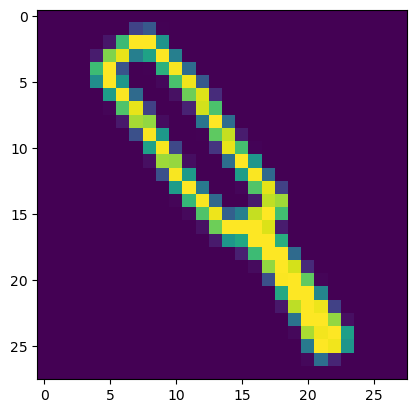

In [13]:
%matplotlib inline  
idx = randint(0, len(originalTestImages))
print(class_names[np.argmax(predictions, axis=1)[idx]])
print(class_names[int(actualLabels[idx].item())])
print(predictions[idx])
print(np.argmax(predictions, axis=1)[idx])
plt.imshow(originalTestImages[idx].reshape(28,28))

In [14]:
originalTestImages[0].shape

(784,)

(40000, 28, 28, 1)
(1, 28, 28, 1)


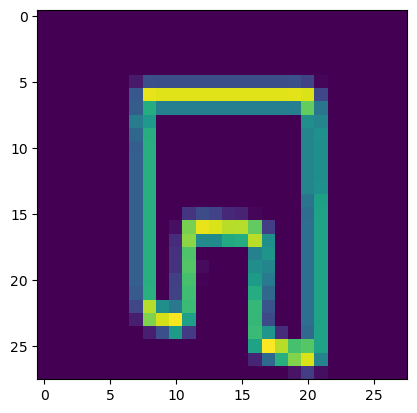

In [101]:
from PIL import Image

image = Image.open('pants.png')

image = image.resize((28, 28))
image = Image.eval(image, lambda x: 255 - x)


imgArr = np.asarray(image).astype('float32')
imgArr /= 255.0
imgArr = imgArr[:, :, 2:3]
imgArr = np.expand_dims(imgArr, axis=0)


image.show()

print(x_test.shape)
print(imgArr.shape)

plt.imshow(imgArr.reshape(28,28))

In [102]:
prediction = probability_model.predict(imgArr)

print(prediction)

print(class_names[int(np.argmax(prediction, axis=1))])

1/1 [==============================] - 0s 22ms/step
[[0.00988296 0.00998979 0.01058553 0.00989078 0.00988995 0.0098826
  0.00988349 0.00988486 0.00988468 0.00993492 0.00988358 0.00988608
  0.00988374 0.00990067 0.00988482 0.01008083 0.00988843 0.00988384
  0.00988265 0.00988778 0.00989724 0.00991927 0.00988515 0.00988362
  0.00993905 0.00988304 0.00989024 0.00988228 0.00988238 0.00988955
  0.01684532 0.00988548 0.01123937 0.00988291 0.00988232 0.00988252
  0.00988346 0.00988695 0.0098923  0.00988355 0.00988369 0.00989688
  0.00989393 0.00990613 0.00991875 0.00988259 0.00989779 0.00988359
  0.00988274 0.00989706 0.00988241 0.0098912  0.00991591 0.00988653
  0.00988255 0.00988234 0.009884   0.0099113  0.00988221 0.00995743
  0.00989463 0.00988335 0.00988265 0.00988228 0.0098824  0.00997834
  0.00988351 0.00988416 0.00995097 0.00988241 0.00989053 0.00991821
  0.00988282 0.00988247 0.00988262 0.00988929 0.00988267 0.01129052
  0.00988232 0.00988236 0.0098835  0.0098824  0.00988222 0.009883

In [23]:
pip install google.colab

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Using cached google_colab-1.0.0-py2.py3-none-any.whl
  Using cached notebook-5.2.2-py2.py3-none-any.whl (8.0 MB)
  Using cached ipykernel-4.6.1-py3-none-any.whl (104 kB)
  Using cached ipython-5.5.0-py3-none-any.whl (758 kB)
  Using cached pandas-0.24.2.tar.gz (11.8 MB)
  Preparing metadata (setup.py) ... -^C
anceled
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [17]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [18]:
model.save('keras.h5')

In [20]:
!pip install tensorflowjs 
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/

!zip -r model.zip model 

from google.colab import files
files.download('model.zip')

SyntaxError: invalid syntax (1688856601.py, line 7)